In [84]:
import numpy
from matplotlib import pyplot
%matplotlib inline

def read_file(filename, N, names):
    
    print('Reading '+filename)
    out_array = numpy.zeros(N, dtype=float)

    file_in = open(filename,'r')
    for line in file_in:
        line = line.split()
        mol_name = line[0]
        mol_index = numpy.where(mol_name==names)[0]
        if len(mol_index)==0: 
            print ('Cant find '+ mol_name)
        else:
            out_array[mol_index] = float(line[1])
    file_in.close()

    return out_array


names_full = numpy.loadtxt('actually_all_names.txt', dtype=str)

delta_T =  16#K
T = 300 #K
dG1_cav = numpy.loadtxt('energy_bem_phi1064_eps738.txt')
dG2_cav = numpy.loadtxt('energy_bem_phi1076_eps738.txt')
 
disp_r14 = numpy.loadtxt('vdw_energy_d20.txt')
disp_r28 = numpy.loadtxt('vdw_energy_r28.txt')

disp_layer = disp_r14 - disp_r28

dG1_disp = (disp_r28 + disp_layer*1.8)*1.003
dG2_disp = (disp_r28 + disp_layer*1.8)*0.997

dG1 = dG1_cav + dG1_disp
dG2 = dG2_cav + dG2_disp

TdS = T*(dG2-dG1)/delta_T

ff = open('TdS.txt','w')
for i in range(len(TdS)):
    ff.write(names_full[i]+'\t%1.4f\n'%TdS[i])
ff.close()

names = numpy.loadtxt('TdS_names.txt', dtype=str)
TdS_imp = read_file('TdS.txt',len(names), names)
TdS_exp = read_file('TdS_exp.txt',len(names), names)


Reading TdS.txt
Cant find 1112_tetrachloroethane
Cant find 111_trichloroethane
Cant find 111_trifluoro_222_trimethoxyethane
Cant find 111_trimethoxyethane
Cant find 1122_tetrachloroethane
Cant find 112_trichloro_122_trifluoroethane
Cant find 112_trichloroethane
Cant find 11_diacetoxyethane
Cant find 11_dichloroethane
Cant find 11_dichloroethene
Cant find 11_diethoxyethane
Cant find 11_difluoroethane
Cant find 1234_tetrachlorobenzene
Cant find 1235_tetrachlorobenzene
Cant find 123_trichlorobenzene
Cant find 1245_tetrachlorobenzene
Cant find 124_trichlorobenzene
Cant find 12_dibromoethane
Cant find 12_dichlorobenzene
Cant find 12_dichloroethane
Cant find 12_dichloropropane
Cant find 12_diethoxyethane
Cant find 135_trichlorobenzene
Cant find 13_dichlorobenzene
Cant find 13_dichloropropane
Cant find 13_dimethylnaphthalene
Cant find 14_dichlorobenzene
Cant find 14_dichlorobutane
Cant find 14_dimethyl_piperazine
Cant find 14_dimethylnaphthalene
Cant find 1_bromo_2_chloroethane
Cant find 1_br

In [85]:
len(TdS_exp)

159

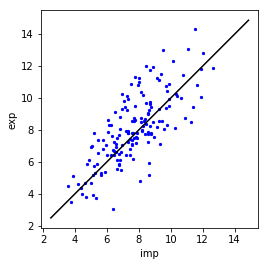

In [86]:
fig,ax = pyplot.subplots()
#TdS_imp *= 1.72
ax.scatter(TdS_imp, TdS_exp, s=5, c='b')


lims = [ 
    numpy.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    numpy.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(numpy.array([lims[0],lims[1]]), numpy.array([lims[0],lims[1]]), c='k')

#print ("Number of molecules in correlation: %i"%len(index_clean_mobley))

ax.set_aspect('equal')
#ax.set_xlim(lims)
#ax.set_ylim(lims)
ax.set_xlabel('imp')
ax.set_ylabel('exp')
fig.savefig('TdS_comparison.pdf')


In [87]:
correl = numpy.corrcoef(TdS_imp, TdS_exp)
print ('Correlation coeff bem: ')
print (correl)

rmsd = numpy.sqrt(numpy.sum(numpy.abs(TdS_imp - TdS_exp)**2)/len(TdS_imp))
print ('RMSD')
print(rmsd)

mue = numpy.sum(numpy.abs(TdS_imp - TdS_exp))/len(TdS_imp)
print ('MUE')
print (mue)

Correlation coeff bem: 
[[ 1.          0.74383411]
 [ 0.74383411  1.        ]]
RMSD
1.51722291708
MUE
1.16462767296


In [13]:
#import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


key = 'yne'
key_true = []# numpy.chararray(len(bem_c), itemsize=10)
#key_true[:] = "blue"
for i in range(len(names)):
    if key in names[i]:
        key_true.append("red")
    else:
        key_true.append("blue")

trace = go.Scatter(
            x = TdS_imp,
            y = TdS_exp,
            text = names,
            mode='markers',
            marker = dict(size=8,
                        opacity=0.6, color=key_true),
#                        opacity=0.6, color=areas_c),
            hoverinfo = 'text')


max_val = numpy.max(TdS_exp)
ref = go.Scatter( x = numpy.array([0,max_val]),
                  y = numpy.array([0,max_val]),
                  mode = 'lines'
                )

ref2 = go.Scatter( x = numpy.array([0,max_val]),
                  y = numpy.array([1,max_val+1]),
                  mode = 'lines'
                )
ref3 = go.Scatter( x = numpy.array([0,max_val]),
                  y = numpy.array([-1,max_val-1]),
                  mode = 'lines'
                )

data = [trace, ref, ref2, ref3]
    
layout= go.Layout(
    title= 'TdS',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Explicit',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'BEM',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=data, layout=layout)
iplot(fig)

#Cross correlation
correl = numpy.corrcoef(bem_c, mobley_c)
print ('Correlation coeff bem: ')
print (correl)

rmsd = numpy.sqrt(numpy.sum(numpy.abs(bem_c-mobley_c)**2)/len(bem_c))
print ('RMSD')
print(rmsd)

mue = numpy.sum(numpy.abs(bem_c-mobley_c))/len(bem_c)
print ('MUE')
print (mue)

NameError: name 'bem_c' is not defined